<a href="https://colab.research.google.com/github/CarineMS/SpotifyTop10_2019/blob/main/Spotify_Top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Portifólio Data Science**

by [Carine Soares](https://www.linkedin.com/in/carinemsoares/)

---

<h1>Análise dos Dados do Spotify - Top 50 2019</h1>

Os dados são fornecidos pela comunidade de cientista de dados *Kaggle* que é uma plataforma de aprendizado e prática de Data Science. Por meio do portal [Kaggle](https://www.kaggle.com/leonardopena/top50spotify2019) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="100%" src="https://developer.spotify.com/assets/branding-guidelines/logo@2x.png"></center>

<sub>*Neste **notebook**, iremos analisar os dados referentes as TOP 10 músicas do ano de 2019 e analisar quais insights podem ser extraídos a partir de dados brutos.*</sub>

## Dicionário das Variáveis 


* `Track.Name` : Nome da música
* `Artist.Name`: Nome do cantor
* `Genre`: Genero musical
* `Beats.Per.Minute`: Quantidade de batidas por minuto	
* `Energy`: Faixa da intensidade transmitida pela música
* `Danceability`: Medida de dançabilidade	
* `Loudness..dB..`: Volume em décibeis	
* `Liveness`: Medida de probabilidade da gravação ao vivo
* `Valence.`: Positividade musical transmitida	
* `Length.`: Tamanho da música em minutos
* `Acousticness..`: Faixa de quão acustica é a música	
* `Speechiness.`: Quantidade de palavras	
* `Popularity`


## Obtenção dos dados

In [22]:
# instalação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/content/drive/MyDrive/top50.csv',encoding='ISO-8859-1')


In [24]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [25]:
df = df.rename(columns={'Unnamed: 0': 'ID'})

In [26]:
df = df.set_index('ID')

In [27]:
df.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
ID,,,,,,,,,,,,,
46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
47,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


## Overview

head + info

O overview dos dados traz informações sobre dados ausentes, valores únicos e o tipo de cada uma das variáveis. Ou seja, há insumo para análise de valores desbalanceados, presença de outliers e tipos de variáveis inconsistentes. 

In [28]:
# Overview dos dados
pd.DataFrame({'type': df.dtypes,
              'nan': df.isna().sum(),
              '%nan': (df.isna().sum()/df.shape[0])*100,
              'nunique':df.nunique()}).reset_index(drop=False)


,index,type,nan,%nan,nunique
0,Track.Name,object,0,0.0,50
1,Artist.Name,object,0,0.0,38
2,Genre,object,0,0.0,21
3,Beats.Per.Minute,int64,0,0.0,31
4,Energy,int64,0,0.0,31
5,Danceability,int64,0,0.0,29
6,Loudness..dB..,int64,0,0.0,9
7,Liveness,int64,0,0.0,22
8,Valence.,int64,0,0.0,39
9,Length.,int64,0,0.0,44


In [29]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


## Análise Exploratória

Violin plot da Popularidade em cada genero


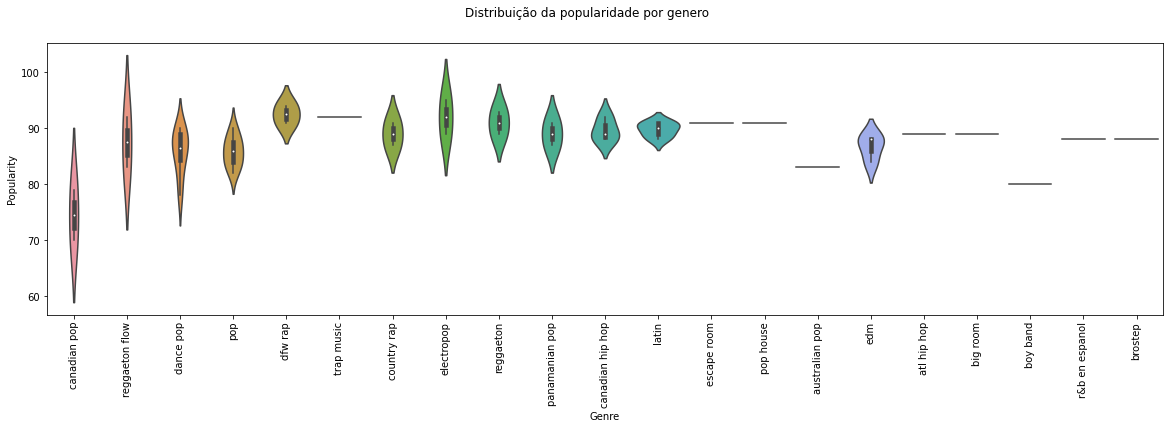

In [31]:
print("Violin plot da Popularidade em cada genero")
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.violinplot(x = 'Genre',
                    y = 'Popularity',
                    data = df,
                    line_width=2)
plt.suptitle('Distribuição da popularidade por genero')
plt.xticks(rotation=90);


Violin plot da Popularidade em cada genero


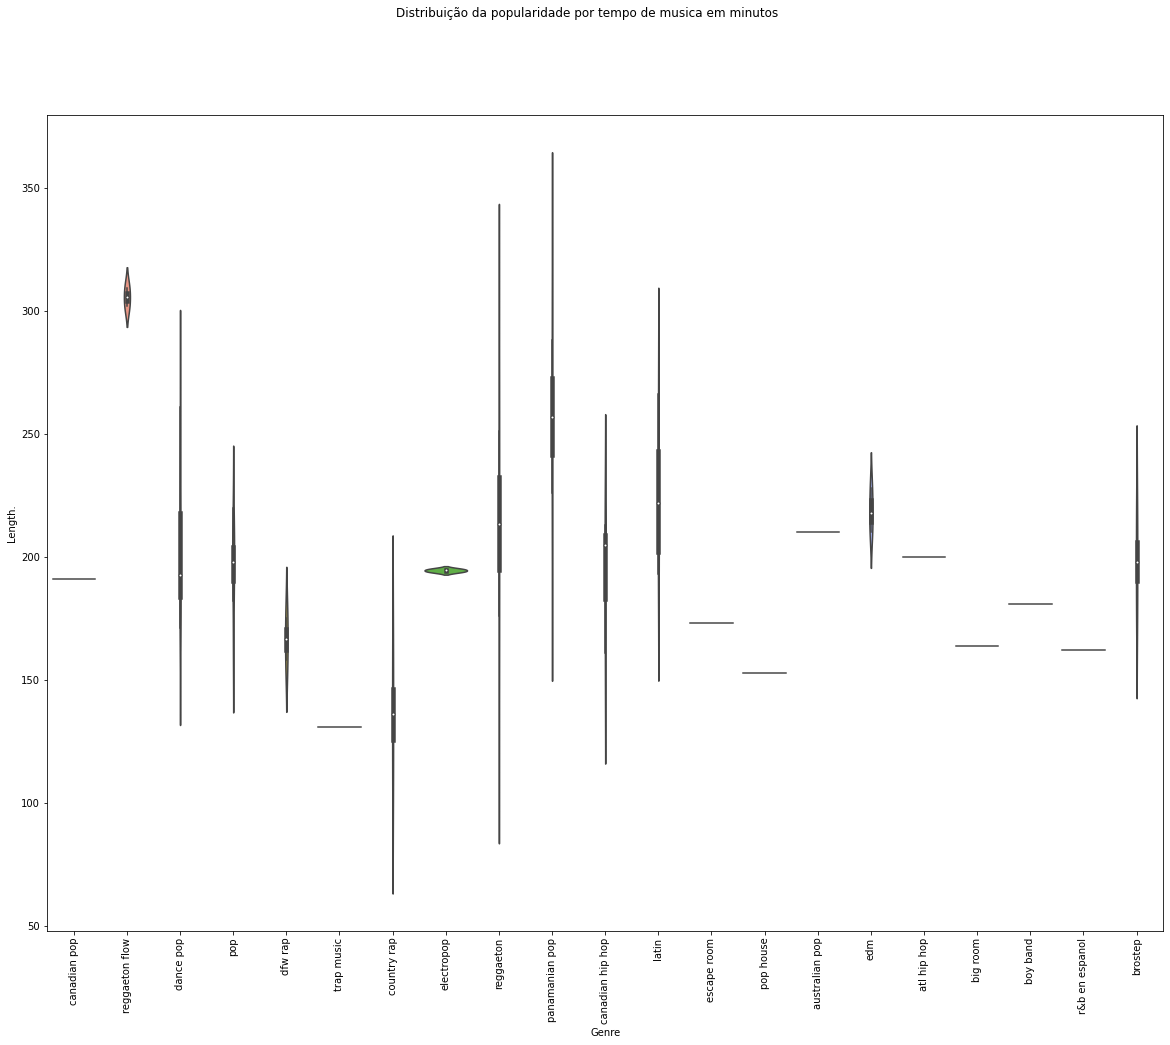

In [35]:
print("Violin plot da Popularidade em cada genero")
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.violinplot(x = 'Genre',
                    y = 'Length.',
                    data = df,
                    line_width=2)
plt.suptitle('Distribuição da popularidade por tempo de musica em minutos')
plt.xticks(rotation=90);

<Figure size 720x576 with 0 Axes>

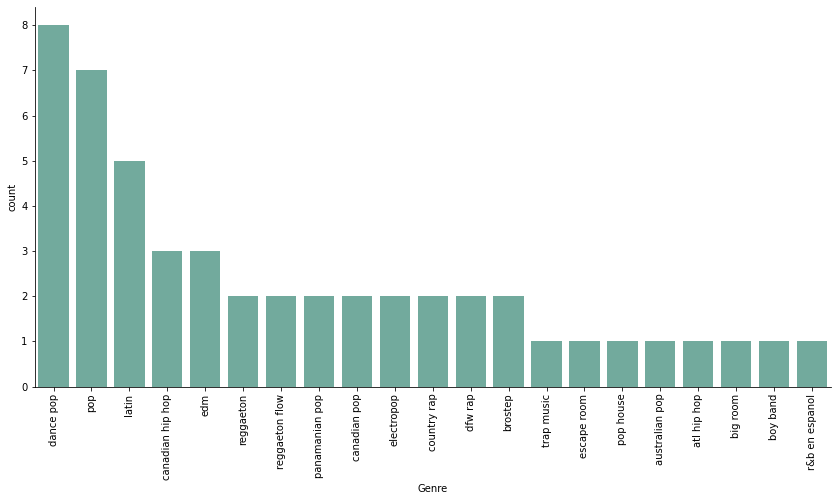

In [42]:
plt.figure(figsize=(10,8))
figure1 = sns.catplot(x = 'Genre',
                     kind = "count",
                     height = 6,
                     aspect = 10/5,
                     color = "#69b3a2",
                     order = df['Genre'].value_counts().index,
                     data = df)
figure1.set_xticklabels(rotation=90)

### Limpeza

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203e8abd50>,
      dtype=object)

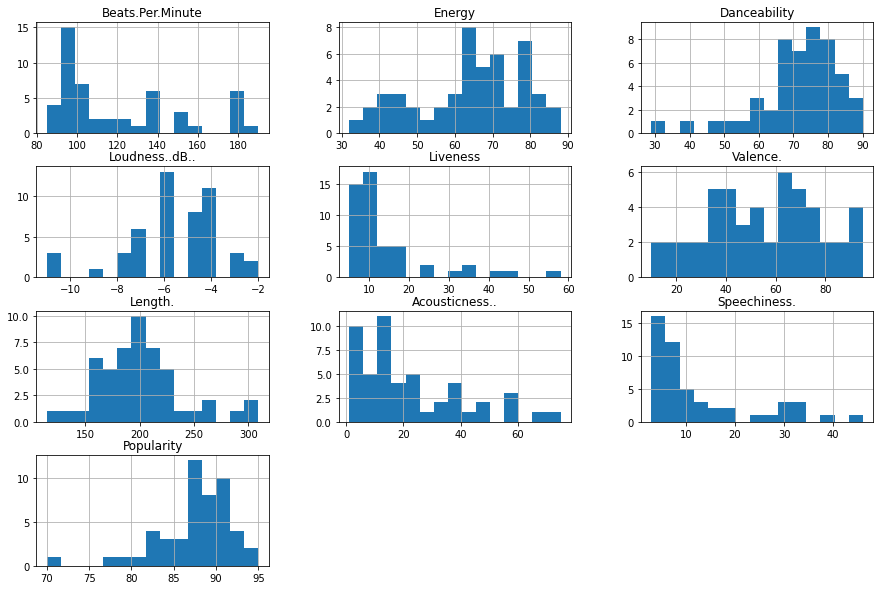

In [ ]:
df.hist(bins=15, figsize=(15,10))

### Conclusões